In [1]:
#this notebook is building a new dataset to test why the zero class is not detected by branch exits

In [20]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [10]:
dataset = tf.keras.datasets.cifar10.load_data()

In [63]:
def loadDataPipeline():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
    
    CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    validation_images, validation_labels = train_images[:5000], train_labels[:5000]
    train_images, train_labels = train_images[5000:], train_labels[5000:]

    train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
    test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
    validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))
    train_ds = (train_ds
            .map(augment_images))
#             .shuffle(buffer_size=int(train_ds_size),reshuffle_each_iteration=True))
#             .batch(batch_size=batch_size, drop_remainder=True))
    test_ds = (test_ds
            .map(augment_images))
            # .shuffle(buffer_size=int(train_ds_size)) ##why would you shuffle the test set?
#             .batch(batch_size=batch_size, drop_remainder=True))

    validation_ds = (validation_ds
            .map(augment_images))
            # .shuffle(buffer_size=int(train_ds_size))
#             .batch(batch_size=batch_size, drop_remainder=True))
    return train_ds, test_ds, validation_ds

In [60]:
def augment_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    # image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

def prepareAlexNetDataset(dataset, batch_size =32):
        (train_images, train_labels), (test_images, test_labels) = dataset
        
        validation_images, validation_labels = train_images[:5000], train_labels[:5000]
        train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
        test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
        validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

        train_ds_size = len(list(train_ds))
        train_ds_size = len(list(test_ds))
        validation_ds_size = len(list(validation_ds))
        train_ds = (train_ds
            .map(augment_images))
#             .shuffle(buffer_size=int(train_ds_size),reshuffle_each_iteration=True))
#             .batch(batch_size=batch_size, drop_remainder=True))
        test_ds = (test_ds
            .map(augment_images))
            # .shuffle(buffer_size=int(train_ds_size)) ##why would you shuffle the test set?
#             .batch(batch_size=batch_size, drop_remainder=True))

        validation_ds = (validation_ds
            .map(augment_images))
            # .shuffle(buffer_size=int(train_ds_size))
#             .batch(batch_size=batch_size, drop_remainder=True))
        return train_ds, test_ds, validation_ds

In [56]:
train_ds, test_ds, validation_ds = prepareAlexNetDataset(dataset,1)

In [57]:
# (train_images, train_labels), (test_images, test_labels) = dataset

In [66]:
def visualize(train_ds):
    CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    plt.figure(figsize=(5,5))
    for i, (image, label) in enumerate(test_ds.take(1)):
#         print(image)
#         ax = plt.subplot(5,5,i+1)
        plt.imshow(image)
        plt.title(CLASS_NAMES[label.numpy()[0]])
        plt.axis('off')
    return

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


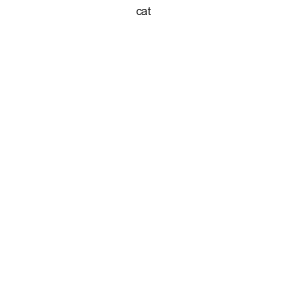

In [67]:
train_ds, test_ds, validation_ds = loadDataPipeline()
visualize(train_ds)

In [33]:
train_labels[train_labels == 0] = 255
train_labels[train_labels == 6] = 254

train_labels[train_labels == 255] = 6
train_labels[train_labels == 254] = 0

print(train_labels)

[[0]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [36]:
train_labels_df = pd.DataFrame(train_labels)
train_labels_df.to_csv("results/altTrain_labels.csv", sep=',', mode='w',index=False,header=False)

In [38]:
test_labels[test_labels == 0] = 255
test_labels[test_labels == 6] = 254

test_labels[test_labels == 255] = 6
test_labels[test_labels == 254] = 0

In [40]:
test_labels_df = pd.DataFrame(train_labels)
test_labels_df.to_csv("results/altTest_labels.csv", sep=',', mode='w',index=False,header=False)

In [50]:
import keras
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# validation_images, validation_labels = train_images[:5000], alt_trainLabels[:5000]
# train_ds = tf.data.Dataset.from_tensor_slices((train_images, alt_trainLabels))
# test_ds = tf.data.Dataset.from_tensor_slices((test_images, alt_testLabels))

###normal method
print(len(train_images))
validation_images, validation_labels = train_images[:5000], train_labels[:5000] #get the first 5k training samples as validation set
train_images, train_labels = train_images[5000:], train_labels[5000:] # now remove the validation set from the training set.
print(len(train_images))
print(len(validation_images))

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

50000
45000
5000


In [6]:
len(validation_images)

5000

In [12]:
(x_train, x_valid) = (train_images[5000:], train_images[:5000])
(y_train, y_valid) = (train_labels[5000:], train_labels[:5000])

In [18]:
print(len(train_labels), len(x_valid))

50000 5000


In [48]:
import pandas as pd

x = [1,2,3,4,5,6,7,8,9,0]

y = x[2:]
print(y)
print(x)
valid_labels = train_labels[:5000]
train_labels = train_labels[5000:]
print(len(train_labels))
print(len(valid_labels))
df = pd.DataFrame(valid_labels,columns=['val'])
# print(df)
print(df.groupby('val').size())


[3, 4, 5, 6, 7, 8, 9, 0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
40000
5000
val
0    500
1    514
2    513
3    530
4    480
5    449
6    511
7    515
8    505
9    483
dtype: int64
